In [1]:
import sys
!{sys.executable} -m pip install --upgrade --user pip # update the pip package installer
!{sys.executable} -m pip install -U numpy pandas uproot3 matplotlib --user # install required packages

  Using cached pip-21.3.1-py3-none-any.whl (1.7 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Using cached numpy-1.21.4-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached pandas-1.3.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached uproot3-3.14.4-py3-none-any.whl (117 kB)
  Using cached matplotlib-3.5.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached setuptools_scm-6.3.2-py3-none-any.whl (33 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires keras-nightly~=2.5.0.dev, which is not installed.
tensorboard 2.5.0 requires tensorboard-data-server<0.7.0,>=0.6.

In [2]:
import pandas as pd # to store data as dataframes
import numpy as np # for numerical calculations such as histogramming
import math # for mathematical functions such as square root
import uproot3 # to read .root files as dataframes
import matplotlib.pyplot as plt # for plotting

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc10-opt/lib/python3.9/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc10-opt/lib/python3.9/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [3]:
signal_path = 'https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_345324.ggH125_WW2lep.2lep.root'
background_path = 'https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_363492.llvv.2lep.root'

In [4]:
# Signal data
signal_data = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
signal_tree = uproot3.open(signal_path)["mini"] # open the tree called mini
signal_numevents = uproot3.numentries(signal_path, "mini") # number of events
print("Number of events in signal: ", signal_numevents)

Number of events in signal:  628685


In [5]:
# Background data
background_data = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
background_tree = uproot3.open(background_path)["mini"] # open the tree called mini
background_numevents = uproot3.numentries(background_path, "mini") # number of events
print("Number of events in background: ", background_numevents)

Number of events in background:  3409043


In [6]:
fraction = 0.002

In [7]:
# loop for signal events
for data in signal_tree.iterate(["lep_n","met_et"], # add more variables here if you want to use them
                        outputtype=pd.DataFrame, # choose output type as pandas DataFrame
                        entrystop=signal_numevents*fraction): # process up to numevents*fraction
    signal_data = signal_data.append(data) # append dataframe from this batch to the dataframe for the whole sample

signal_data

,lep_n,met_et
entry,,
0,2,48396.093750
1,2,57800.261719
2,2,54502.253906
3,2,50026.292969
4,2,31579.775391
...,...,...
1252,2,38232.878906
1253,2,1282.095459
1254,2,19987.412109


In [8]:
# loop for background events
for data in background_tree.iterate(["lep_n","met_et"], # add more variables here if you want to use them
                        outputtype=pd.DataFrame, # choose output type as pandas DataFrame
                        entrystop=background_numevents*fraction): # process up to numevents*fraction
    background_data = background_data.append(data) # append dataframe from this batch to the dataframe for the whole sample
    
background_data

,lep_n,met_et
entry,,
0,2,130877.859375
1,2,36958.644531
2,2,42118.476562
3,2,40383.035156
4,2,46337.421875
...,...,...
6813,2,251621.390625
6814,2,60630.671875
6815,2,120945.406250


In [9]:
def plot_histograms(sig_data, bkg_data):

    xmin = 0 # GeV
    xmax = 200 # GeV
    step_size = 10 # GeV
    
    bin_edges = np.arange(start=xmin, # The interval includes this value
                     stop=xmax+step_size, # The interval doesn't include this value
                     step=step_size ) # Spacing between values
 
    hist_signal, bins = np.histogram(sig_data['met_et'], # background test
                                   bins=bin_edges, # number of bins in function definition
                                   density=True ) # area under the histogram will sum to 1
    scale_sig = len(sig_data['met_et']) / sum(hist_signal) # between raw and normalised
    
    plt.hist(sig_data['met_et'], # signal data
             bins=bin_edges, # lower and upper range of the bins
             weights= 1.0*scale_sig, # scale factor
             density=True, # area under the histogram will sum to 1
             histtype='stepfilled', # lineplot that's filled
             color='red', label='Signal', # Background (train)
             alpha=0.5) # half transparency
    
    hist_background, bins = np.histogram(bkg_data['met_et'], # background test
                                   bins=bin_edges, # number of bins in function definition
                                   density=True ) # area under the histogram will sum to 1
    scale_bkg = len(bkg_data['met_et']) / sum(hist_background) # between raw and normalised
    
    plt.hist(bkg_data['met_et'], # background data
             bins=bin_edges, # lower and upper range of the bins
             weights= 1.0*bkg_scale, # scale factor
             density=True, # area under the histogram will sum to 1
             histtype='stepfilled', # lineplot that's filled
             color='blue', label='Background', # Signal (train)
             alpha=0.7) # half transparency
             

    plt.axes([0.1,0.3,0.85,0.65]) # left, bottom, width, height 

    
    # Add text 'for education' on plot
    plt.text(0.1, # x
             0.76, # y
             'for education', # text
             style='italic',
             fontsize=8 ) 
    
    # Add energy and luminosity
    lumi_used = str(lumi*fraction) # luminosity to write on the plot
    plt.text(0.1, # x
             0.7, # y
             r'$\sqrt{s}=13 TeV$') # text
    
    # Add a label for the analysis carried out
    plt.text(0.1, # x
             0.64, # y
             r'$Z \rightarrow e^{+}e^{-}$') # text 

    # draw the legend
    # 'upper left', 'upper right', 'lower left', 'lower right'
    axes.legend(frameon=True, # no box around the legend
                     loc='upper right' ) # legend location 
    
    # x-axis label
    plt.xlabel(r'di-lepton invariant mass $\mathrm{m_{ll}}$ [GeV]')
    
    # y-axis label
    plt.ylabel('Events')

    plt.xticks(np.arange(xmin, xmax, step=20))
    
    plt.title('Mass of the Z boson')
    return

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc10-opt/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


TypeError: object of type 'numpy.float64' has no len()

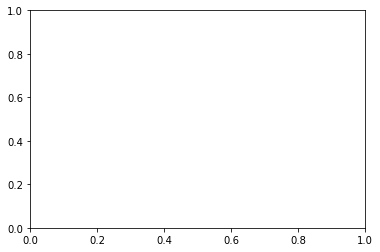

In [10]:
plot_histograms(signal_data, background_data)